# Physics 494/594
## Building a Feed Forward Neural Network


In [5]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')

## Last Time

### [Notebook Link: 01_A_Basic_Neural_Network.ipynb](./01_A_Basic_Neural_Network.ipynb)

- Built our first neural network
- randomly assigned weights and biases
- performed activiations one layer at a time

## Today

- Work together in groups to write code to propagate through layers
- Manually 'train' to discern features

### Recall our 3x3 picture

In [6]:
L = 3
N0 = L*L
x = [0,0,0,1,1,0,1,1,0]

def print_rectangle(x):
    print(''.join([ci if (i+1)%L else ci+'\n' for i,ci in 
                 enumerate([' ▉ ' if cx else ' ░ ' for i,cx in enumerate(x)])]))
print_rectangle(x)

 ░  ░  ░ 
 ▉  ▉  ░ 
 ▉  ▉  ░ 



<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
Write a function that computes the activation for the output layer, given all weights and biases. Use a sigmoid neuron.
</div>

Recall, that for a single layer: 
\begin{align}
a_j^\ell &= \sigma \left(\sum_k w_{jk}^\ell a_k^{\ell-1} + b_j^\ell \right) \\
 &= \sigma\left(\mathsf{w}^\ell \cdot \bf{a}^{\ell-1} + \bf{b}^\ell\right)
\end{align}

Your function should take the input layer, and all weights and biases as parameters.  Apply the activation sequentially to each layer, and return the output.

In [7]:
def feed_forward(a0,w,b):
    a = a0
    num_layers = len(w)
    
    # feed the input layer forward
    for ℓ in range(num_layers):
        z = np.dot(w[ℓ],a) + b[ℓ]
        a = 1.0/(1.0+np.exp(-z))
    return a

<div class="span alert alert-success">
Randomly set all the weights and biases for the 1 hidden and 1 output layer of our network.  We used a hidden-layer with only 2 neurons, feel free to change this.
</div>

In [17]:
N = [9,2,1]
w,b = [],[]

# append to the weights and biases list.  Make sure you get the dimensions correct!
for ℓ in range(1,len(N)):
    w.append(np.random.uniform(low=-10,high=10,size=(N[ℓ],N[ℓ-1])))
    b.append(np.random.uniform(low=-1,high=1, size=N[ℓ]))

print(feed_forward(x,w,b))

[0.93315607]


<div class="span alert alert-success">
 Compute (and <code>print</code>) the activation of the output layer. You should keep randomly generating new weights and biases until you find a set that is close to 1 (which we want for our rectangle)
</div>

In [15]:
print(feed_forward(x,w,b))

[0.0003554]


### You can visualize your network with:

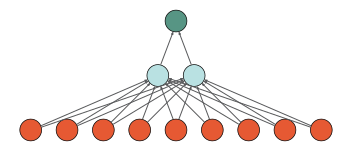

In [18]:
ml4s.draw_network(N)

<div class="span alert alert-success">
<h4> Excercises </h4>
<ol>
    <li>Find the output from the neural network for the following inputs 
        <p>
            <code>x = [1,1,1,0,0,0,0,0,0]</code> <br />
            <code>x = [1,0,0,0,1,0,0,0,1]</code> <br />
            <code>x = [0,0,0,0,0,0,0,0,1]</code> <br />
        </p>
       You can use the <code>print_rectangle(x)</code> function to visualize.
    </li>
    <li> Modify your <code>feed_forward</code> function to use a ReLU instead of a sigmoid.  Are there any changes?
    </li>
</ol>
</div>

In [21]:
x = [0,0,0,0,0,0,0,0,1]
print_rectangle(x)
print(feed_forward(x,w,b))

 ░  ░  ░ 
 ░  ░  ░ 
 ░  ░  ▉ 

[0.73548153]


## Visualizing a Simple Neural Network

Until now we have considered a feed forward neural network that was a non-linear function of an input variable $x$ corresponding to a 3x3 grid of pixels.  This is a function on a 9-dimensional space and cannot be easily interpreted.  

To gain some intuition, lets consider a **much** simpler network without a hidden layer that maps 2 input neurons to 1 output neuron, i.e.:

\begin{equation}
f : \mathbb{R}^2 \to \mathbb{R}
\end{equation}

In [33]:
N = [2,200,100,1]
w,b = [],[]
for ℓ in range(1,len(N)):
    w.append(np.random.uniform(low=-10,high=10,size=(N[ℓ],N[ℓ-1])))
    b.append(np.random.uniform(low=-1,high=1, size=N[ℓ]))

labels = [[r'$x_0$',r'$x_1$'],[r'$f(x_0,x_1)$']]
#ml4s.draw_network(N,node_labels=labels)

### We can visualize this using a heat map

This is **not** an efficient way to program this up, but it is fine for now.  First we apply the network for each input values in our grid.

In [34]:
grid_size = 50 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)

# we will apply our simple NN for all grid points in the box x = [-0.5..0.5,-0.5..0.5]
for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size-0.5,j/grid_size-0.5]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]

<div class="span alert alert-warning">
    Note: we need to extract the 0<sup>th</sup> element of <code>feed_forward</code> as it returns an array.
</div>

Plot the result.

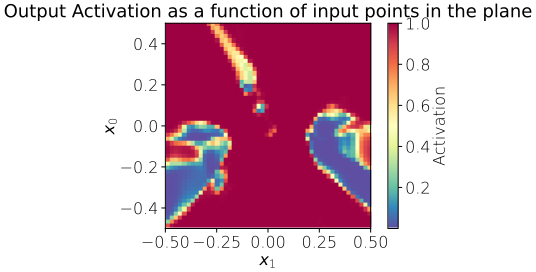

In [35]:
plt.imshow(a1,origin='lower', extent=(-0.5,0.5,-0.5,0.5),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

### Can also visualize in 3D!

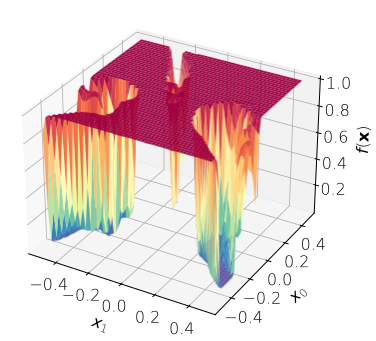

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X0, a1, rstride=1, cstride=1, cmap='Spectral_r', 
                       linewidth=0, antialiased=True, rasterized=True)
ax.set_xlabel(r'$x_1$',labelpad=8)
ax.set_ylabel(r'$x_0$',labelpad=8)
ax.set_zlabel(r'$f(\mathbf{x} )$',labelpad=8);